    Data Preprocessing

The goal of this notebook is to prepare a csv file for ML modeling. This includes the following:
1. one-hot encoding of categories
2. Scaling features
3. split into train/test pools

1. Initial data relook

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [96]:
df = pd.read_csv('MN_Housing_EDA.csv')
df.head(5)

,PROPERTY TYPE,ADDRESS,CITY,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,MLS#,LATITUDE,LONGITUDE,BED_BIN,BATH_BIN
0,Townhouse,1006 Van White Memorial Blvd,Minneapolis,55411.0,334900.0,3.0,3.0,Sumner - Glenwood,1505.0,1306.0,2015,1,223.0,279.0,6678953.0,44.988599,-93.291941,3-5 Beds,3-4 Baths
1,Condo/Co-op,1211 Lagoon Ave #410,Minneapolis,55408.0,219900.0,1.0,1.0,Lowry Hill East,818.0,23391.0,2006,4,269.0,376.0,6762787.0,44.948981,-93.294965,<3 Beds,<3 Baths
2,Single Family Residential,9532 Yosemite Rd,Bloomington,55437.0,649900.0,4.0,5.0,Bloomington,3492.0,19166.0,1974,15,186.0,0.0,6752088.0,44.830344,-93.355163,3-5 Beds,3-4 Baths
3,Condo/Co-op,3251 Louisiana Ave S #201,Saint Louis Park,55426.0,424900.0,2.0,2.0,Saint Louis Park,1670.0,126890.0,2007,36,254.0,811.0,6744587.0,44.942344,-93.369518,<3 Beds,<3 Baths
4,Townhouse,1315 Douglas Dr N,Golden Valley,55422.0,280000.0,3.0,2.0,Golden Valley,1364.0,139304.0,1966,44,205.0,375.0,6739597.0,44.993391,-93.360514,3-5 Beds,3-4 Baths


In [97]:
# double check for nulls
df.isnull().sum()

PROPERTY TYPE         0
ADDRESS               0
CITY                  0
ZIP OR POSTAL CODE    0
PRICE                 0
BEDS                  0
BATHS                 0
LOCATION              0
SQUARE FEET           0
LOT SIZE              0
YEAR BUILT            0
DAYS ON MARKET        0
$/SQUARE FEET         0
HOA/MONTH             0
MLS#                  0
LATITUDE              0
LONGITUDE             0
BED_BIN               0
BATH_BIN              0
dtype: int64

In [98]:
df.dtypes

PROPERTY TYPE          object
ADDRESS                object
CITY                   object
ZIP OR POSTAL CODE    float64
PRICE                 float64
BEDS                  float64
BATHS                 float64
LOCATION               object
SQUARE FEET           float64
LOT SIZE              float64
YEAR BUILT              int64
DAYS ON MARKET          int64
$/SQUARE FEET         float64
HOA/MONTH             float64
MLS#                  float64
LATITUDE              float64
LONGITUDE             float64
BED_BIN                object
BATH_BIN               object
dtype: object

In [99]:
df['ZIP OR POSTAL CODE'] = df['ZIP OR POSTAL CODE'].astype(float).astype(int).astype(str)
df.dtypes

PROPERTY TYPE          object
ADDRESS                object
CITY                   object
ZIP OR POSTAL CODE     object
PRICE                 float64
BEDS                  float64
BATHS                 float64
LOCATION               object
SQUARE FEET           float64
LOT SIZE              float64
YEAR BUILT              int64
DAYS ON MARKET          int64
$/SQUARE FEET         float64
HOA/MONTH             float64
MLS#                  float64
LATITUDE              float64
LONGITUDE             float64
BED_BIN                object
BATH_BIN               object
dtype: object

In [100]:
# MLS, address, latitude, and longitude will be removed as they are unique to the specific property and could all be used as identifiers and won't help model
df_clean = df.drop(columns=['MLS#','ADDRESS', 'LATITUDE', 'LONGITUDE'])
df_clean.head(5)

,PROPERTY TYPE,CITY,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,BED_BIN,BATH_BIN
0,Townhouse,Minneapolis,55411,334900.0,3.0,3.0,Sumner - Glenwood,1505.0,1306.0,2015,1,223.0,279.0,3-5 Beds,3-4 Baths
1,Condo/Co-op,Minneapolis,55408,219900.0,1.0,1.0,Lowry Hill East,818.0,23391.0,2006,4,269.0,376.0,<3 Beds,<3 Baths
2,Single Family Residential,Bloomington,55437,649900.0,4.0,5.0,Bloomington,3492.0,19166.0,1974,15,186.0,0.0,3-5 Beds,3-4 Baths
3,Condo/Co-op,Saint Louis Park,55426,424900.0,2.0,2.0,Saint Louis Park,1670.0,126890.0,2007,36,254.0,811.0,<3 Beds,<3 Baths
4,Townhouse,Golden Valley,55422,280000.0,3.0,2.0,Golden Valley,1364.0,139304.0,1966,44,205.0,375.0,3-5 Beds,3-4 Baths


In [101]:
# $ per square foot will be dropped due to an overlap with the y value (price). 
df_clean = df_clean.drop(columns=['$/SQUARE FEET'])
df_clean.head(5)

,PROPERTY TYPE,CITY,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,HOA/MONTH,BED_BIN,BATH_BIN
0,Townhouse,Minneapolis,55411,334900.0,3.0,3.0,Sumner - Glenwood,1505.0,1306.0,2015,1,279.0,3-5 Beds,3-4 Baths
1,Condo/Co-op,Minneapolis,55408,219900.0,1.0,1.0,Lowry Hill East,818.0,23391.0,2006,4,376.0,<3 Beds,<3 Baths
2,Single Family Residential,Bloomington,55437,649900.0,4.0,5.0,Bloomington,3492.0,19166.0,1974,15,0.0,3-5 Beds,3-4 Baths
3,Condo/Co-op,Saint Louis Park,55426,424900.0,2.0,2.0,Saint Louis Park,1670.0,126890.0,2007,36,811.0,<3 Beds,<3 Baths
4,Townhouse,Golden Valley,55422,280000.0,3.0,2.0,Golden Valley,1364.0,139304.0,1966,44,375.0,3-5 Beds,3-4 Baths


In [102]:
df_clean.nunique()

PROPERTY TYPE           5
CITY                   20
ZIP OR POSTAL CODE     54
PRICE                 297
BEDS                   13
BATHS                   7
LOCATION              101
SQUARE FEET           574
LOT SIZE              241
YEAR BUILT            130
DAYS ON MARKET         40
HOA/MONTH             166
BED_BIN                 3
BATH_BIN                3
dtype: int64

looks like there is an issue with city, zip, and location. city likely contains zips whichh contains locations. Considering the total of ~ 600 data points, it looks like zip may be the best to move forward. It has a nice medium of many variables, but not so many that only a single house will be in many locations. 

In [103]:
df_clean = df_clean.drop(columns=['CITY', 'LOCATION'])

In [104]:
df_clean.head(5)

,PROPERTY TYPE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,HOA/MONTH,BED_BIN,BATH_BIN
0,Townhouse,55411,334900.0,3.0,3.0,1505.0,1306.0,2015,1,279.0,3-5 Beds,3-4 Baths
1,Condo/Co-op,55408,219900.0,1.0,1.0,818.0,23391.0,2006,4,376.0,<3 Beds,<3 Baths
2,Single Family Residential,55437,649900.0,4.0,5.0,3492.0,19166.0,1974,15,0.0,3-5 Beds,3-4 Baths
3,Condo/Co-op,55426,424900.0,2.0,2.0,1670.0,126890.0,2007,36,811.0,<3 Beds,<3 Baths
4,Townhouse,55422,280000.0,3.0,2.0,1364.0,139304.0,1966,44,375.0,3-5 Beds,3-4 Baths


In [105]:
# finally will remove both the bed bin and bath bin as its redundant with beds and baths
df_clean = df_clean.drop(columns=['BED_BIN', 'BATH_BIN'])

In [106]:
df_clean.head(5)

,PROPERTY TYPE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,HOA/MONTH
0,Townhouse,55411,334900.0,3.0,3.0,1505.0,1306.0,2015,1,279.0
1,Condo/Co-op,55408,219900.0,1.0,1.0,818.0,23391.0,2006,4,376.0
2,Single Family Residential,55437,649900.0,4.0,5.0,3492.0,19166.0,1974,15,0.0
3,Condo/Co-op,55426,424900.0,2.0,2.0,1670.0,126890.0,2007,36,811.0
4,Townhouse,55422,280000.0,3.0,2.0,1364.0,139304.0,1966,44,375.0


Data looks good and is ready to be split for categorical and numerical datasets. 

In [107]:
MN_num = df_clean[['PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET', 'HOA/MONTH']]
MN_cat = df_clean[['PROPERTY TYPE', 'ZIP OR POSTAL CODE']]

Next is to one-hot encode the MN_cat

In [108]:
OH_Encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [109]:
MN_OH_cat = OH_Encoder.fit_transform(MN_cat)

In [110]:
encoded_cols = OH_Encoder.get_feature_names_out(['PROPERTY TYPE', 'ZIP OR POSTAL CODE'])
MN_cat_encoded = pd.DataFrame(MN_OH_cat, columns=encoded_cols, index=MN_cat.index)

In [111]:
MN_cat_encoded.head(5)

,PROPERTY TYPE_Condo/Co-op,PROPERTY TYPE_Multi-Family (2-4 Unit),PROPERTY TYPE_Other,PROPERTY TYPE_Single Family Residential,PROPERTY TYPE_Townhouse,ZIP OR POSTAL CODE_55101,ZIP OR POSTAL CODE_55102,ZIP OR POSTAL CODE_55103,ZIP OR POSTAL CODE_55104,ZIP OR POSTAL CODE_55105,...,ZIP OR POSTAL CODE_55428,ZIP OR POSTAL CODE_55429,ZIP OR POSTAL CODE_55430,ZIP OR POSTAL CODE_55431,ZIP OR POSTAL CODE_55432,ZIP OR POSTAL CODE_55437,ZIP OR POSTAL CODE_55438,ZIP OR POSTAL CODE_55443,ZIP OR POSTAL CODE_55444,ZIP OR POSTAL CODE_55445
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
MN_cat_encoded.shape

(686, 59)

In [113]:
df_combined = pd.concat([MN_num, MN_cat_encoded], axis=1)

In [114]:
df_combined.head(5)

,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,HOA/MONTH,PROPERTY TYPE_Condo/Co-op,PROPERTY TYPE_Multi-Family (2-4 Unit),...,ZIP OR POSTAL CODE_55428,ZIP OR POSTAL CODE_55429,ZIP OR POSTAL CODE_55430,ZIP OR POSTAL CODE_55431,ZIP OR POSTAL CODE_55432,ZIP OR POSTAL CODE_55437,ZIP OR POSTAL CODE_55438,ZIP OR POSTAL CODE_55443,ZIP OR POSTAL CODE_55444,ZIP OR POSTAL CODE_55445
0,334900.0,3.0,3.0,1505.0,1306.0,2015,1,279.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,219900.0,1.0,1.0,818.0,23391.0,2006,4,376.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,649900.0,4.0,5.0,3492.0,19166.0,1974,15,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,424900.0,2.0,2.0,1670.0,126890.0,2007,36,811.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,280000.0,3.0,2.0,1364.0,139304.0,1966,44,375.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
# should remove some outliers, especially from the Square feet. This will be done by removing all points outside of 3 standard deviations

SF_mean = df_combined['SQUARE FEET'].mean()
SF_std = df_combined['SQUARE FEET'].std()
upperlimit = SF_mean + (SF_std * 3)
lowerlimit = SF_mean - (SF_std * 3)

In [116]:
df_combined_SFoutliers = df_combined[(df_combined['SQUARE FEET'] < upperlimit) & 
                                     (df_combined['SQUARE FEET'] > lowerlimit)].copy()

In [117]:
df_combined_SFoutliers.shape

(678, 67)

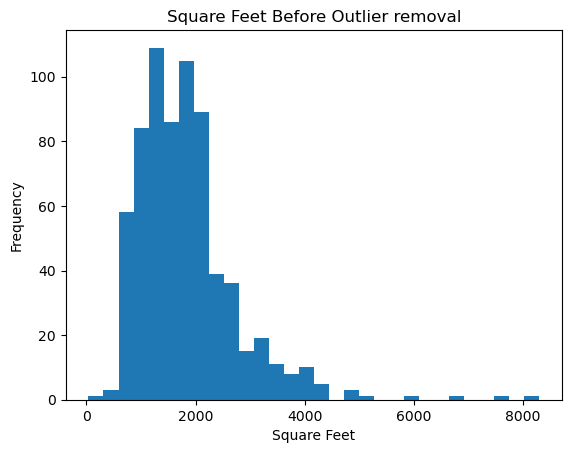

In [135]:
plt.hist(df_combined['SQUARE FEET'], bins=30)
plt.xlabel('Square Feet')
plt.ylabel('Frequency')
plt.title('Square Feet Before Outlier removal')
plt.show()

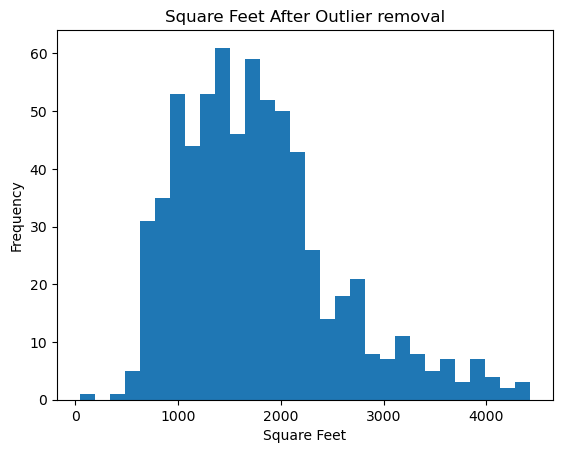

In [136]:
plt.hist(df_combined_SFoutliers['SQUARE FEET'], bins=30)
plt.xlabel('Square Feet')
plt.ylabel('Frequency')
plt.title('Square Feet After Outlier removal')
plt.show()

Looks like clear outliers were removed from the square feet data with only 8 data points removed. Will do the same for lot size

In [120]:
LS_mean = df_combined_SFoutliers['LOT SIZE'].mean()
LS_std = df_combined_SFoutliers['LOT SIZE'].std()
upperlimit = LS_mean + (LS_std * 3)
lowerlimit = LS_mean - (LS_std * 3)

df_combined_out = df_combined_SFoutliers[(df_combined_SFoutliers['LOT SIZE'] < upperlimit) & 
                                     (df_combined_SFoutliers['LOT SIZE'] > lowerlimit)].copy()

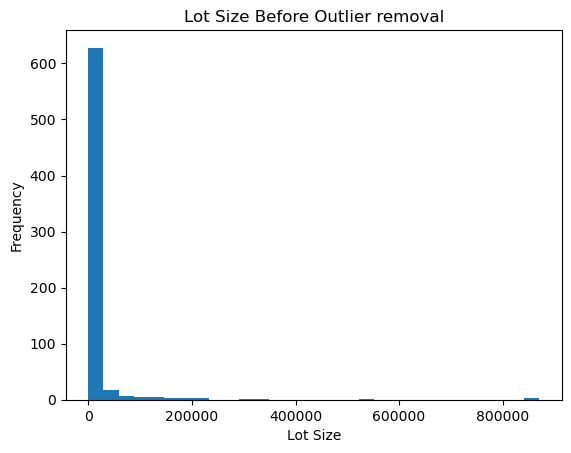

In [138]:
plt.hist(df_combined_SFoutliers['LOT SIZE'], bins=30)
plt.xlabel('Lot Size')
plt.ylabel('Frequency')
plt.title('Lot Size Before Outlier removal')
plt.show()

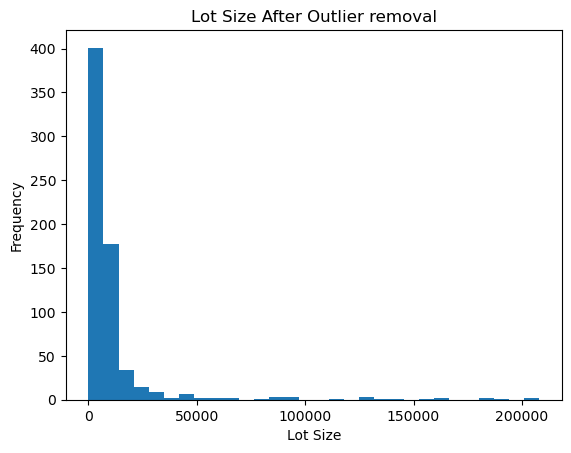

In [137]:
plt.hist(df_combined_out['LOT SIZE'], bins=30)
plt.xlabel('Lot Size')
plt.ylabel('Frequency')
plt.title('Lot Size After Outlier removal')
plt.show()

In [123]:
df_combined_out.shape

(671, 67)

Will keep the outliers removed because it removes things like ranches and mansions which may affect the regression modelling. Also, ~98% of the data still exists

In [124]:
MN_num_X = df_combined_out[['BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET', 'HOA/MONTH']]
cols = df_combined_out.columns.difference(MN_num_X.columns)
MN_OH_X = df_combined_out[cols]

Next step is for scaling. A standard scaler will be used, and if needed, i can come back and use a log scale for something like LOT SIZE

In [125]:
scaler = StandardScaler()
scaler.set_output(transform="pandas")
MN_num_scaled = scaler.fit_transform(MN_num_X)

In [126]:
MN_num_scaled.head(5)

,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,HOA/MONTH
0,-0.130194,1.042857,-0.355115,-0.423733,1.727826,-0.841401,0.285985
1,-1.662827,-1.175073,-1.244596,0.459637,1.494160,-0.548467,0.558652
2,0.636123,3.260787,2.217516,0.290642,0.663349,0.525621,-0.498285
3,-0.896510,-0.066108,-0.141485,4.599456,1.520123,2.576153,1.781438
4,-0.130194,-0.066108,-0.537672,5.095999,0.455646,3.357308,0.555841


In [127]:
MN_ALL = pd.concat([MN_num_scaled, MN_OH_X], axis=1)
MN_ALL.head(5)

,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,HOA/MONTH,PRICE,PROPERTY TYPE_Condo/Co-op,PROPERTY TYPE_Multi-Family (2-4 Unit),...,ZIP OR POSTAL CODE_55428,ZIP OR POSTAL CODE_55429,ZIP OR POSTAL CODE_55430,ZIP OR POSTAL CODE_55431,ZIP OR POSTAL CODE_55432,ZIP OR POSTAL CODE_55437,ZIP OR POSTAL CODE_55438,ZIP OR POSTAL CODE_55443,ZIP OR POSTAL CODE_55444,ZIP OR POSTAL CODE_55445
0,-0.130194,1.042857,-0.355115,-0.423733,1.727826,-0.841401,0.285985,334900.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.662827,-1.175073,-1.244596,0.459637,1.494160,-0.548467,0.558652,219900.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.636123,3.260787,2.217516,0.290642,0.663349,0.525621,-0.498285,649900.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-0.896510,-0.066108,-0.141485,4.599456,1.520123,2.576153,1.781438,424900.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.130194,-0.066108,-0.537672,5.095999,0.455646,3.357308,0.555841,280000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


All data has been scaled appropriately and next is to form the train/test split (80/20)

In [128]:
y = MN_ALL[['PRICE']]
X = MN_ALL.drop(columns='PRICE')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [129]:
X_train.shape

(536, 66)

In [130]:
X_test.shape

(135, 66)

In [131]:
y_train.shape

(536, 1)

In [132]:
y_test.shape

(135, 1)

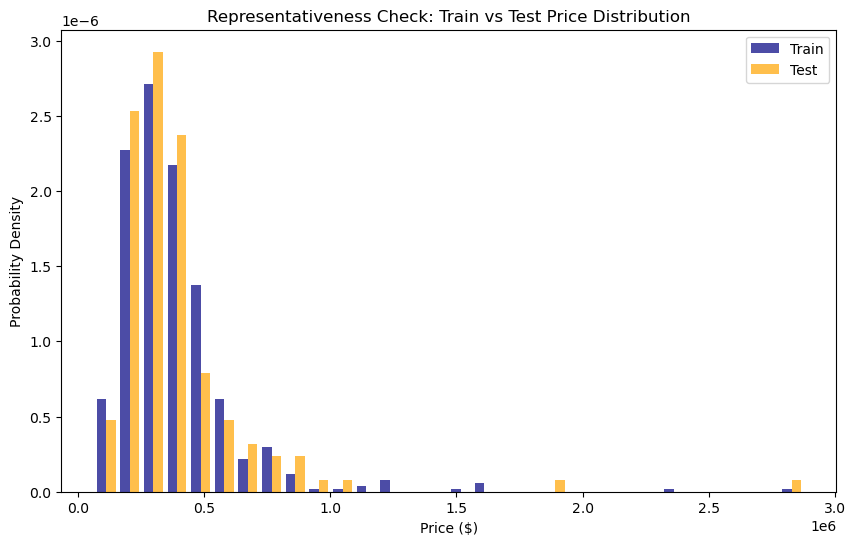

In [134]:
y_train_flat = y_train.values.flatten()
y_test_flat = y_test.values.flatten()

# Use density=True to compare the SHAPE (since Train is much larger than Test)
plt.figure(figsize=(10, 6))
plt.hist([y_train_flat, y_test_flat], bins=30, label=['Train', 'Test'], 
         density=True, alpha=0.7, color=['navy', 'orange'])

plt.xlabel('Price ($)')
plt.ylabel('Probability Density')
plt.title('Representativeness Check: Train vs Test Price Distribution')
plt.legend()
plt.show()
